In [1]:
import sys
sys.executable

'C:\\Users\\oula.aabkari\\Anaconda3\\envs\\cvision\\python.exe'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2

## Face and Eye Detection Through WebCam

In [4]:
#Loading the cascades
face_cascade = cv2.CascadeClassifier(r"C:\Users\oula.aabkari\Desktop\Google Drive\Github\Computer Vision\Module_1_Face_Recognition\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\oula.aabkari\Desktop\Google Drive\Github\Computer Vision\Module_1_Face_Recognition\haarcascade_eye.xml")

In [5]:
#Define a function that will do the detection
#This function will be applied on single images coming from the webcam's video
#Images need to be in black and white
def detect(gray, frame):  #gray:black and white image   #frame: original image
    #get the coords of the rectangle that will detect the face x,y,w,h
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)    
    #scaleFactor: how much the size of the img is reduced/how much the size of the filters is increased
    #minNeighbors: in order for a pixel zone to be accepted we need to have a minimum of 
    #neighbor zones that are accepted
    
    #next we iterate through the faces and draw a rectangle around them. Inside the rectangle we will detect the eyes
    for x,y,w,h in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),color=(255,0,0),thickness=2) #draw the rectangle in red
        
        #we detect the eyes inside our region of interest: the face rectangle
        #we get both the grey version region of interest (for eye detection) & the color version (for drawing the eye rectangles)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        
        #detect the eyes:
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3)    #1.1 & 3 are experimental
        for ex,ey,ew,eh in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+ew),color=(0,255,0),thickness=2)  #draw the eye rectangle in blue
    
    return frame

In [6]:
#We will apply the detect function on the last frame we get from the webcam?
video_capture = cv2.VideoCapture(0)  #0 for internal webcam

#====================================================
#To Write the video file
#2nd argument is video codec, depending on the operating system
# WINDOWS: *'DIVX'
# LINUX:   *'XVID'
writer = cv2.VideoWriter('myvideo.mp4',cv2.VideoWriter_fourcc(*'DIVX'),20) #20=frames persecond
#=====================================================

while True:
    _, frame = video_capture.read()  #get the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  #convert the frame to gray
    
    #apply the detect function
    canvas = detect(gray,frame)
    
    #display the process in a window
    cv2.imshow('Video',canvas)
    
    #stop the process if we press "q" on the keyboard (ESC <=> & 0xFF=27)
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break
        
video_capture.release() #turnoff the webcam
cv2.destroyAllWindows()

error: OpenCV(4.5.3) D:\bld\libopencv_1633800998308\work\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


The waitKey(0) function returns -1 when no input is made whatsoever. It waits for a key event the amount of milliseconds we give it. As soon the event occurs i.e. a Button is pressed it returns a 32-bit integer.

Assume we press 'q' cv2.waitKey(1) output will be 'q' in binary: 0b1110001

ord('q') is in decimal and equals 113.

To convert cv2.waitKey(1) to decimal, we &0xFF it

    cv2.waitKey(1) = 0b1110001
              0xFF :
           Decimal = 255
            Binary = 11111111
       Hexadecimal = 0xff
               
0xFF is all ones, so Any number we & 0xff will remain the same
      
   cv2.waitKey(1) & 0xFF = 113
or cv2.waitKey(1) & 0xFF = 113

will give us 133 in decimals, because 0xff is in decimals

Hence by comparing the integer to the ord(char) value, we can check for a key pressed event and break the loop.

## Face and Smile Detection Through WebCam

In [4]:
#Loading the cascades
face_cascade = cv2.CascadeClassifier(r"C:\Users\oula.aabkari\Desktop\Google Drive\Github\Computer Vision\Module_1_Face_Recognition\haarcascade_frontalface_default.xml")
smile_cascade = cv2.CascadeClassifier(r"C:\Users\oula.aabkari\Desktop\Google Drive\Github\Computer Vision\Module_1_Face_Recognition\haarcascade_smile.xml")

In [5]:
def detect_smile(gray, frame):  
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)    

    for x,y,w,h in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),color=(255,0,0),thickness=2) #draw the rectangle in red

        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        
        #increase No. of neighbors for a smile to make the detection thorough and not confuse everything for a smile
        #tuto says 22, but that detects my mouth regardless if I smile or not
        smile = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22)  
        
        for sx,sy,sw,sh in smile:
            cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sw),color=(0,0,255),thickness=2)  
    
    return frame

In [6]:
video_capture = cv2.VideoCapture(0) 

while True:
    _, frame = video_capture.read()  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    
    canvas = detect_smile(gray,frame)
    
    cv2.imshow('Video',canvas)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break
        
video_capture.release() 
cv2.destroyAllWindows()

error: OpenCV(4.5.3) D:\bld\libopencv_1633800998308\work\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


## OpenCV Basics (Jose Portilla)

<b><big>1. Processing Images

In [11]:
img_path = r"C:\Users\oula.aabkari\Pictures\2.jpg"

In [12]:
img = cv2.imread(img_path)
img.shape

(2976, 3968, 3)

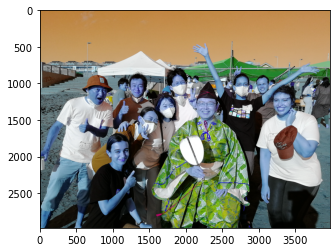

In [13]:
#OpenCV and matplotlib have different expectation of RedGreenBlue Channels
#Matplotlib --> RGB, OpenCV --> BGR
plt.imshow(img)

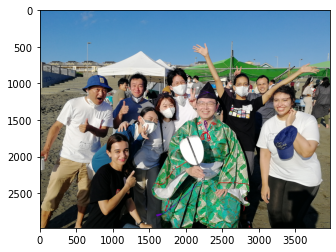

In [14]:
fixed_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(fixed_img)

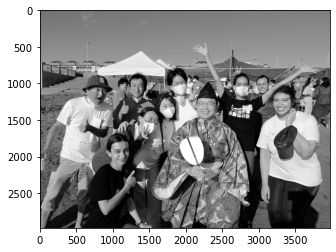

In [21]:
#Read the image in greyscale
grey_img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

#color mapping of imshow shows darker values as blue and lighter values as yellow
#so we specify cmap='gray'
plt.imshow(grey_img,cmap='gray')

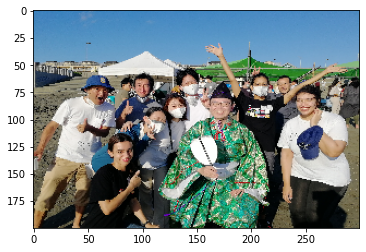

In [28]:
#Resize an image

plt.imshow(resized_img)

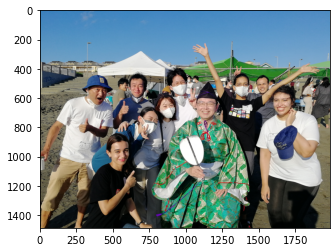

In [32]:
#Resize image
resized_img1 = cv2.resize(fixed_img,(300,200))

#recize by ratio:
w_ratio, h_ratio = 0.5, 0.5

resized_img2 = cv2.resize(fixed_img,(0,0),fixed_img,w_ratio,h_ratio)

plt.imshow(resized_img2)

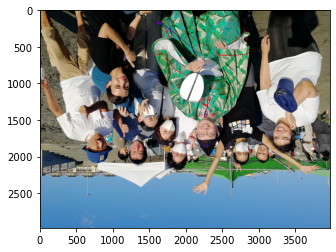

In [35]:
#Flip an image
flipped_img = cv2.flip(fixed_img,0)  #0 horizontal axis, 1 vertical axis <=> mirrored?
plt.imshow(flipped_img)

In [38]:
#Write the image
cv2.imwrite('myimage.jpg',grey_img)

True

<b><big>2. Drawing on Images

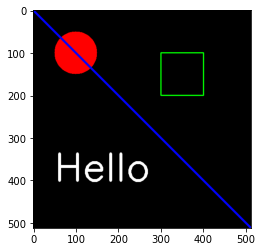

In [30]:
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)

#pt1: top left corner, pt2: bottom right corner
cv2.rectangle(blank_img,pt1=(300,100),pt2=(400,200),color=(0,255,0),thickness=2)

#for a filled shape we use a thickness of -1
cv2.circle(blank_img,center=(100,100),radius=50,color=(255,0,0),thickness=-1)

cv2.line(blank_img,pt1=(0,0),pt2=(512,512),color=(0,0,255),thickness=3)

font = cv2.FONT_HERSHEY_SIMPLEX
#org = bottom left corner of the txt string
cv2.putText(blank_img,text='Hello',org=(50,400),fontFace=font,fontScale=3,color=(255,255,255),lineType=cv2.LINE_AA,thickness=5)

plt.imshow(blank_img)

<b><big>3. Direct Drawing on Images with a Mouse

In [16]:
#Draw circles with a mouse click
def draw_circle(event,x,y,flags,params): #function arguments are returned by setMousecallback
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,center=(x,y),radius=50,color=(255,0,0),thickness=-1)
        
img = np.zeros((500,500,3),dtype=np.int8)

cv2.namedWindow(winname='Mydrawing') #creates a window
cv2.setMouseCallback('Mydrawing',draw_circle) #connect the function to the window

while True:
    cv2.imshow('Mydrawing',img) #show our img in the window we created
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

In [15]:
#Draw rectangles with mouse dragging

#VARIABLES
drawing = False #True while mouse button down, False while up
ix, iy = -1, -1 #initialize start of rectangle

#FUNCTION
def draw_rectangle(event,x,y,flags,params):
    global ix, iy, drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:  #we started drawing
        drawing = True
        ix, iy = x, y
    
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
    
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
    
     
#SHOWING THE IMAGE
img = np.zeros((500,500,3),dtype=np.int8)

cv2.namedWindow(winname='Mydrawing')
cv2.setMouseCallback('Mydrawing',draw_rectangle)

while True:
    cv2.imshow('Mydrawing',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

## Object Detection with OpenCV (J.Portilla)